<a href="https://colab.research.google.com/github/aman-garg0001/Face-Recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using face_recognition library

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=a998887d8e9415a0dfcff2e8808bf06cb03d601435efbfe17c1726be7a705734
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


## Importing necessary libraries

In [ ]:
import os
import cv2
import face_recognition

In [ ]:
cd /content/drive/MyDrive/Face_Recognition

/content/drive/MyDrive/Face_Recognition


## Setting up parameters for face_recognition

In [ ]:
Tolerance = 0.5
frame_thickness = 3
font_thickness = 2
MODEL = "cnn"

In [ ]:
cd Known_Faces

/content/drive/MyDrive/Face_Recognition/Known_Faces


## Training using face_recognition library

In [ ]:
known_faces = []
known_names = []
for name in os.listdir():
  count = 0
  print(name)
  for img in os.listdir(f"{name}"):
    #print(img)
    image = face_recognition.load_image_file(f"{name}/{img}")
    if len(face_recognition.face_encodings(image)) > 0:
      encoding = face_recognition.face_encodings(image)[0]
    known_faces.append(encoding) 
    known_names.append(name)
    count += 1
    if(count > 50):
      break



In [ ]:
cd ..

/content/drive/My Drive/Face_Recognition


In [ ]:
import pickle
file1 = open("known_names.pkl", "wb")
pickle.dump(known_names, file1)
file2 = open("known_faces.pkl", "wb")
pickle.dump(known_faces, file2)
file1.close()
file2.close()

In [ ]:
import pickle
file1 = open("known_names.pkl", "rb")
known_names = pickle.load(file1)
file2 = open("known_faces.pkl", "rb")
known_faces = pickle.load(file2)
file1.close()
file2.close()

In [ ]:
len(known_faces)

102

In [ ]:
cd /content/drive/MyDrive/Face_Recognition/Unknown_Faces/

/content/drive/MyDrive/Face_Recognition/Unknown_Faces


In [ ]:
from google.colab.patches import cv2_imshow

Match found : aman
Match found : govind


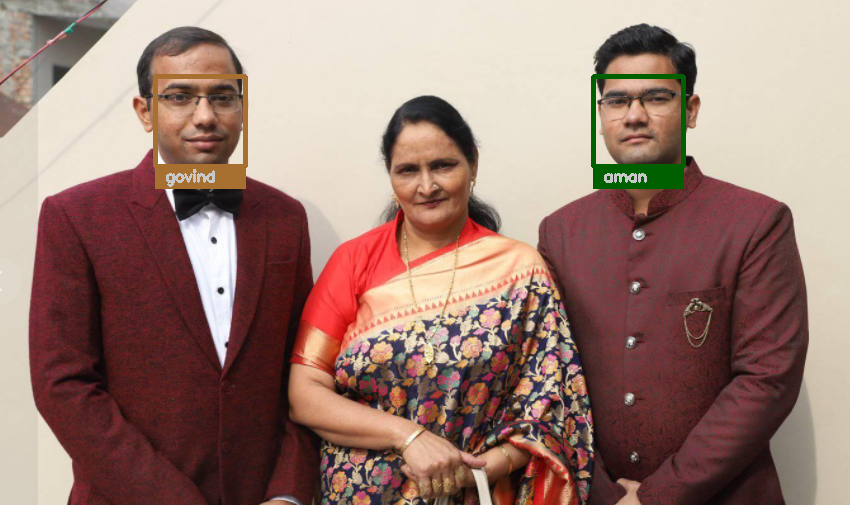

In [ ]:
image = face_recognition.load_image_file("/content/drive/MyDrive/Face_Recognition/Unknown_Faces/Screenshot_53.png")
locations = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image,locations)
image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

for face_encoding,face_location in zip(encodings,locations):
  results = face_recognition.compare_faces(known_faces,face_encoding, Tolerance)
  match = None
  if True in results:
    match = known_names[results.index(True)]
    print(f"Match found : {match}")

    top_left = (face_location[3],face_location[0])
    bottom_right = (face_location[1],face_location[2])
    
    color = [(ord(c.lower())-97)*8 for c in match[:3]]
    cv2.rectangle(image,top_left,bottom_right,color,frame_thickness)

    top_left = (face_location[3],face_location[2])
    bottom_right = (face_location[1],face_location[2]+22)
    cv2.rectangle(image,top_left,bottom_right,color,cv2.FILLED)
    cv2.putText(image,match,(face_location[3]+10,face_location[2]+15),cv2.FONT_HERSHEY_SIMPLEX,0.5,(200,200,200),font_thickness)

cv2_imshow(image)

## Predicting faces in folder Unknown_Faces and moving the predicted photos to their corresponding folder

In [ ]:
path = "/content/drive/MyDrive/Face_Recognition/Unknown_Faces/"
path2save = "/content/drive/MyDrive/Face_Recognition/Recognised_Faces/"

In [ ]:
count = 0
for filename in os.listdir():
  print(filename)
  image = face_recognition.load_image_file(f"{filename}")
  locations = face_recognition.face_locations(image)
  encodings = face_recognition.face_encodings(image,locations)
  image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

  for face_encoding,face_location in zip(encodings,locations):
    results = face_recognition.compare_faces(known_faces,face_encoding,Tolerance)
    match = None
    if True in results:

      match = known_names[results.index(True)]
      print(f"Match found : {match}")
      if match not in os.listdir(path2save):
        os.mkdir(path2save + "/" + match)
      cv2.imwrite(path2save + "/" + match + "/img_" + str(count) + ".jpg", image)
      count += 1  



IMG_20181214_195826.jpg
Match found : aman
Screenshot_53.png
Match found : aman
Match found : govind
Screenshot_1.png
Match found : govind
